In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import math
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import datetime as dt
%matplotlib inline
import os
import sys 
from tqdm import tqdm
sys.path.append('/home/drdarby/Desktop/cape_mend_SM_LCS/datatools')
import datatools as tools
import cmocean as cm
from scipy.interpolate import griddata
import xgcm
print(xgcm.__path__)


['/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/xgcm']


In [2]:
path_llc270 = '/media/drdarby/Elements/data/llc270/'

THETA_files, THETA_filepaths = tools.get_data_paths_from_binary(path_llc270, 'THETA_snap', file_end = 'nc' )
ETAN_files, ETAN_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ETAN_snap', file_end = 'nc' )

ADVr_TH_files, ADVr_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVr_TH', file_end = 'nc' )
ADVx_TH_files, ADVx_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVx_TH', file_end = 'nc' )
ADVy_TH_files, ADVy_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'ADVy_TH', file_end = 'nc' )
DFxE_TH_files, DFxE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFxE_TH', file_end = 'nc' )
DFyE_TH_files, DFyE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFyE_TH', file_end = 'nc' )
DFrE_TH_files, DFrE_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFrE_TH', file_end = 'nc' )
DFrI_TH_files, DFrI_TH_filepaths = tools.get_data_paths_from_binary(path_llc270, 'DFrI_TH', file_end = 'nc' )
TFLUX_files, TFLUX_filepaths = tools.get_data_paths_from_binary(path_llc270, 'TFLUX', file_end = 'nc' )
oceQsw_files, oceQsw_filepaths = tools.get_data_paths_from_binary(path_llc270, 'oceQsw', file_end = 'nc' )

THETA = xr.open_mfdataset(THETA_filepaths).isel(tile = 6)
ETAN = xr.open_mfdataset(ETAN_filepaths).isel(tile = 6)
ADVr_TH = xr.open_mfdataset(ADVr_TH_filepaths[24]).isel(tile = 6)
ADVx_TH = xr.open_mfdataset(ADVx_TH_filepaths[24]).isel(tile = 6)
ADVy_TH = xr.open_mfdataset(ADVy_TH_filepaths[24]).isel(tile = 6)
DFxE_TH = xr.open_mfdataset(DFxE_TH_filepaths[24]).isel(tile = 6)
DFyE_TH = xr.open_mfdataset(DFyE_TH_filepaths[24]).isel(tile = 6)
DFrE_TH = xr.open_mfdataset(DFrE_TH_filepaths).isel(tile = 6)
DFrI_TH = xr.open_mfdataset(DFrI_TH_filepaths).isel(tile = 6)
TFLUX = xr.open_mfdataset(TFLUX_filepaths).isel(tile = 6)
oceQsw = xr.open_mfdataset(oceQsw_filepaths).isel(tile = 6)

NameError: name 'grid' is not defined

In [4]:
grid_files, grid_filepaths = tools.get_data_paths_from_binary(path_llc270, 'Grid', file_end = 'nc' )
grid = xr.open_mfdataset(grid_filepaths[6])
grid = grid.rename({'i1':'k','i2':'j','i3':'i'})
grid['i'] = (grid['i']-1).astype(int)
grid['j'] = (grid['j']-1).astype(int)
grid['k'] = (grid['k'] -1).astype(int)

<xarray.DataArray 'i' (i: 270)>
array([  0,   1,   2, ..., 267, 268, 269])
Coordinates:
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269

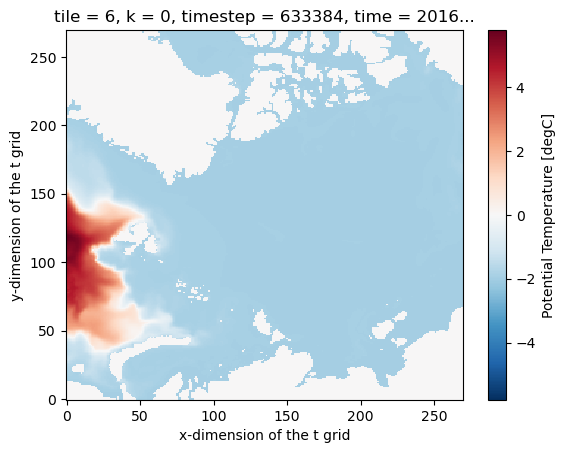

In [6]:
#look into how these are multiplying. 
THETA['THETA'].isel(time=0,k=0).plot()

/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/drdarby/miniconda3/envs/mitgcm/lib/python3.11/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


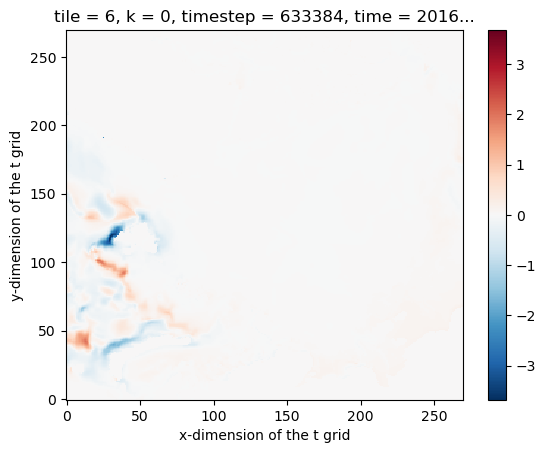

In [95]:
(THETA['THETA']*(1+ETAN['ETAN']/grid.Depth)).where(grid.hFacC.values > 0,0).diff(dim = 'time',label='lower').isel(time=0,k=0).plot()

In [12]:
THETA['THETA']

<xarray.DataArray 'THETA' (time: 12, k: 50, j: 270, i: 270)>
dask.array<getitem, shape=(12, 50, 270, 270), dtype=float32, chunksize=(12, 50, 270, 270), chunktype=numpy.ndarray>
Coordinates:
    tile      int64 6
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 dask.array<chunksize=(12,), meta=np.ndarray>
  * time      (time) datetime64[ns] 2016-02-01 2016-03-01 ... 2017-01-01
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

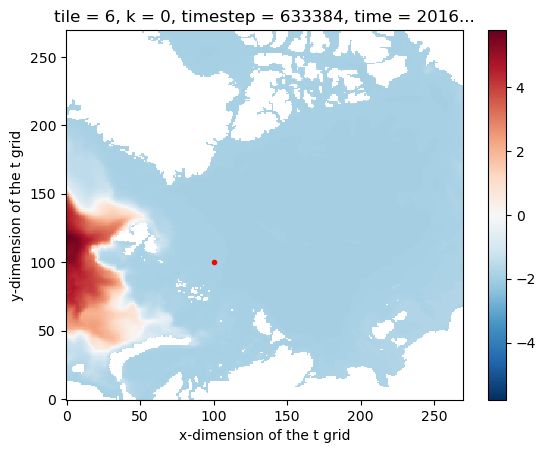

In [112]:
sTHETA = THETA['THETA']*(1+ETAN['ETAN']/grid.Depth.where(grid.Depth!=0))
sTHETA.isel(time=0,k=0).plot()
plt.plot(100,100,'r.')

In [98]:
#G_total
#sTHETA = THETA['THETA']*(1+ETAN['ETAN']/grid.Depth)
sTHETA_dt = sTHETA.diff(dim = 'time',label='lower')

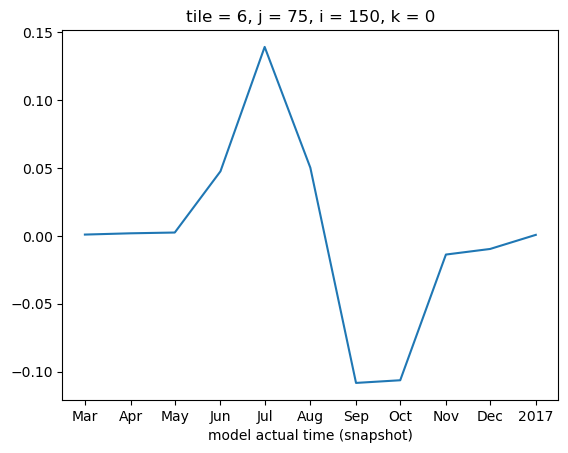

In [23]:
sTHETA_dt.isel(k=0,i=150,j=75).plot()
#plt.plot(75,150,'r.')

In [61]:
sTHETA_dt#.isel(tile=6, k=0,time=0).plot()

<xarray.Dataset>
Dimensions:   (tile: 13, j: 270, i: 270, k: 50, time: 11)
Coordinates:
  * tile      (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 635472 637704 639864 642096 ... 653112 655272 657504
  * time      (time) datetime64[ns] 2016-03-01 2016-04-01 ... 2017-01-01
Data variables:
    *empty*

In [99]:
CellVol = grid['RAC'] * grid['DRF'] * grid['hFacC']
grid['CellVol'] = CellVol

<xarray.DataArray (j: 270, i: 270, k: 50)>
dask.array<mul, shape=(270, 270, 50), dtype=float64, chunksize=(270, 270, 50), chunktype=numpy.ndarray>
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268 269
  * k        (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49

In [100]:
adv_hz_x = ADVx_TH['ADVx_TH'].where(grid.hFacC.values > 0,0).diff(dim='i_g',label='lower')
adv_hz_y = ADVy_TH['ADVy_TH'].where(grid.hFacC.values > 0,0).diff(dim='j_g',label='lower')
adv_vt = ADVr_TH['ADVr_TH'].where(grid.hFacC.values > 0,0).diff(dim='k_l',label='lower')
adv_hz_y = adv_hz_y.rename({'j_g':'j'})
adv_hz_x = adv_hz_x.rename({'i_g':'i'})
adv_vt = adv_vt.rename({'k_l':'k'})
G_adv = (-1*(adv_hz_x[:,:-1,:-1,:] + adv_hz_y[:,:-1,:,:-1]) + adv_vt[:,:,:-1,:-1])/CellVol[:-1,:-1,:-1].where(CellVol[:-1,:-1,:-1]!=0)

In [90]:
G_adv
#G_adv.isel(k=0,time=0).plot()

<xarray.DataArray (time: 12, k: 49, j: 269, i: 269)>
dask.array<truediv, shape=(12, 49, 269, 269), dtype=float64, chunksize=(12, 49, 269, 269), chunktype=numpy.ndarray>
Coordinates:
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 39 40 41 42 43 44 45 46 47 48
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268
    tile      int64 6
    timestep  (time) int64 633384 635472 637704 639864 ... 653112 655272 657504
  * time      (time) datetime64[ns] 2016-01-16T12:00:00 ... 2016-12-16T12:00:00

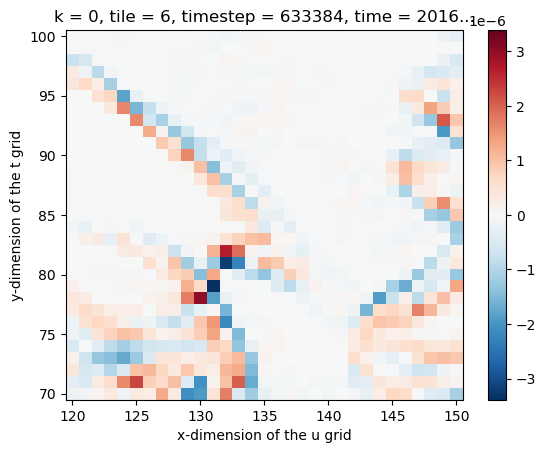

In [38]:
#G_adv.isel(k=0).sel(j=slice(70,100),i=slice(120,150)).plot()

In [101]:
DFxE_TH = DFxE_TH.rename({'i_g':'i'}).where(grid.hFacC.values > 0,0)
DFyE_TH = DFyE_TH.rename({'j_g':'j'}).where(grid.hFacC.values > 0,0)
DFrE_TH = DFrE_TH.rename({'k_l':'k'}).where(grid.hFacC.values > 0,0)
DFrI_TH = DFrI_TH.rename({'k_l':'k'}).where(grid.hFacC.values > 0,0)

In [102]:
dif_hConvH = -1*(DFxE_TH['DFxE_TH'].diff('i',label='lower')[:,:-1,:-1] + DFyE_TH['DFyE_TH'].diff('j',label='lower')[:,:,:,:-1])

# DFrE_TH = DFrE_TH['DFrE_TH']
# DFrI_TH = DFrI_TH['DFrI_TH']

dif_vConvH = DFrE_TH['DFrE_TH'].diff('k',label='lower')+DFrI_TH['DFrI_TH'].diff('k',label='lower')
#Kpp_tend = data['KPPg_TH'].diff('depths',label='lower')
#+ Kpp_tend[:,:,:-1,:-1])
G_diff = (dif_hConvH + dif_vConvH)/CellVol[:-1,:-1,:-1].where(CellVol[:-1,:-1,:-1]!=0)

In [54]:
G_diff

<xarray.DataArray (time: 12, k: 49, j: 269, i: 269)>
dask.array<truediv, shape=(12, 49, 269, 269), dtype=float64, chunksize=(12, 49, 269, 269), chunktype=numpy.ndarray>
Coordinates:
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 39 40 41 42 43 44 45 46 47 48
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 261 262 263 264 265 266 267 268
  * time      (time) datetime64[ns] 2016-01-16T12:00:00 ... 2016-12-16T12:00:00
    tile      int64 6
    timestep  (time) int64 633384 635472 637704 639864 ... 653112 655272 657504

In [138]:
# Seawater density (kg/m^3)
rhoConst = 1029
## needed to convert surface mass fluxes to volume fluxes

# Heat capacity (J/kg/K)
c_p = 3994

# Constants for surface heat penetration (from Table 2 of Paulson and Simpson, 1977)
R = 0.62
zeta1 = 0.6
zeta2 = 20.0
depths = grid['RC']
k = np.arange(50)
q1 = np.array(R*np.exp(1.0/zeta1*depths[:-1]) + (1.0-R)*np.exp(1.0/zeta2*depths[:-1]))
q2 = np.array(R*np.exp(1.0/zeta1*depths[1:]) + (1.0-R)*np.exp(1.0/zeta2*depths[1:]))
q1 = np.append(q1,0)
q2 = np.append(q2,0)
q1 = xr.DataArray(q1,coords=[k],dims=['k'])
q2 = xr.DataArray(q2,coords=[k],dims=['k'])
q1 = q1.where(k<16,0) #correction for no heat pen past 200m
q2 = q2.where(k<16,0)
mskC = grid.hFacC.copy(deep=True).compute()

# Change all fractions (ocean) to 1. land = 0
mskC.values[mskC.values>0] = 1
forcH_subsurf = ((q1*(mskC==1)-q2*(mskC.shift(k=-1)==1))*oceQsw['oceQsw']).transpose('time','k','j','i').isel(k=slice(1,50))
# Surface heat flux (W/m^2)
forcH_surf = ((TFLUX['TFLUX'] - (1-(q1[0]-q2[0]))*oceQsw['oceQsw'])\
              *mskC[0]).transpose('time','j','i').assign_coords(k=0).expand_dims('k')
# Qsw_tend = oceQsw['oceQsw'] / (rhoConst * c_p) / (grid['DRF']* grid['hFacC']) * (q1 -q2) 
# Tflx_tend = (TFLUX['TFLUX'] - oceQsw) / (rhoConst * c_p * grid['DRF'][0] *grid['hFacC'])
# forcH_surf =(TFLUX['TFLUX'] - (1-(q1[0]-q2[0]))*oceQsw['oceQsw'])
# forcH_subsurf = (q1[1:]-q2[1:]*oceQsw['oceQsw'])

forcH = xr.concat([forcH_surf,forcH_subsurf], dim='k')
G_forcing = ((forcH)/(rhoConst*c_p))/(grid['hFacC']*grid['DRF'].where(CellVol!=0))

In [125]:
forcH_surf = ((TFLUX['TFLUX'] + (1-(q1[0]-q2[0]))*oceQsw['oceQsw'])\
              *mskC[0]).transpose('time','j','i').assign_coords(k=0).expand_dims('k')


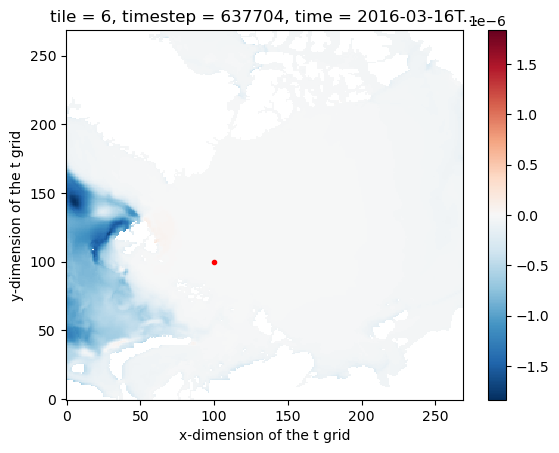

In [104]:
(G_forcing[:,:-1,:-1,:-1].isel(k=0,time=2) + G_adv.isel(k=0,time=2) + G_diff.isel(k=0,time=2)).plot(label='total')
plt.plot(100,100,'r.')

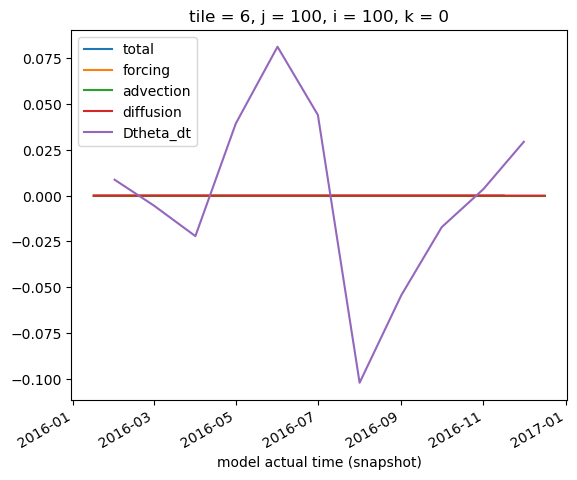

In [105]:
(G_forcing[:,:-1,:-1,:-1].isel(k=0,i=100,j=100) + G_adv.isel(k=0,i=100,j=100) + G_diff.isel(k=0,i=100,j=100)).plot(label='total')
G_forcing[:-1,:-1].isel(k=0,i=100,j=100).plot(label='forcing')
G_adv.isel(k=0,i=100,j=100).plot(label='advection')
G_diff.isel(k=0,i=100,j=100).plot(label='diffusion')
sTHETA_dt.isel(k=0,i=100,j=100).plot(label='Dtheta_dt')

plt.legend()

In [76]:
sTHETA_dt


<xarray.DataArray (time: 11, k: 50, j: 270, i: 270)>
dask.array<sub, shape=(11, 50, 270, 270), dtype=float64, chunksize=(11, 50, 270, 270), chunktype=numpy.ndarray>
Coordinates:
    tile      int64 6
  * j         (j) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * i         (i) int64 0 1 2 3 4 5 6 7 8 ... 262 263 264 265 266 267 268 269
  * k         (k) int64 0 1 2 3 4 5 6 7 8 9 10 ... 40 41 42 43 44 45 46 47 48 49
    timestep  (time) int64 633384 635472 637704 639864 ... 650880 653112 655272
  * time      (time) datetime64[ns] 2016-02-01 2016-03-01 ... 2016-12-01

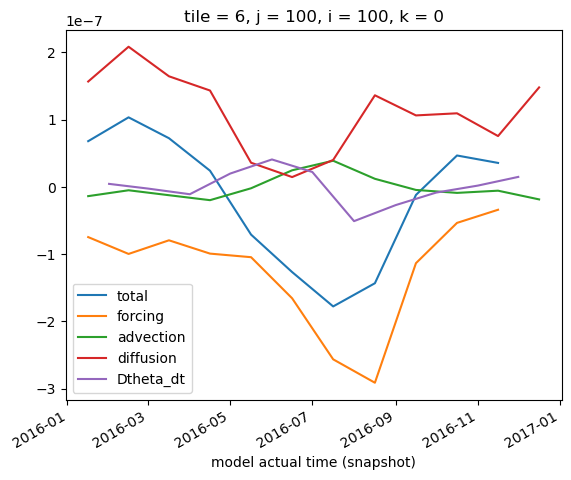

In [139]:
k=0
(G_forcing[:,:-1,:-1,:-1].isel(k=k,i=100,j=100) + G_adv.isel(k=k,i=100,j=100) + G_diff.isel(k=k,i=100,j=100)).plot(label='total')
G_forcing[:-1,:-1].isel(k=k,i=100,j=100).plot(label='forcing')
G_adv.isel(k=k,i=100,j=100).plot(label='advection')
G_diff.isel(k=k,i=100,j=100).plot(label='diffusion')
(sTHETA_dt.isel(k=k,i=100,j=100)/(2e6)).plot(label='Dtheta_dt')
#plt.ylim(-1e-6,1e-6)
plt.legend()

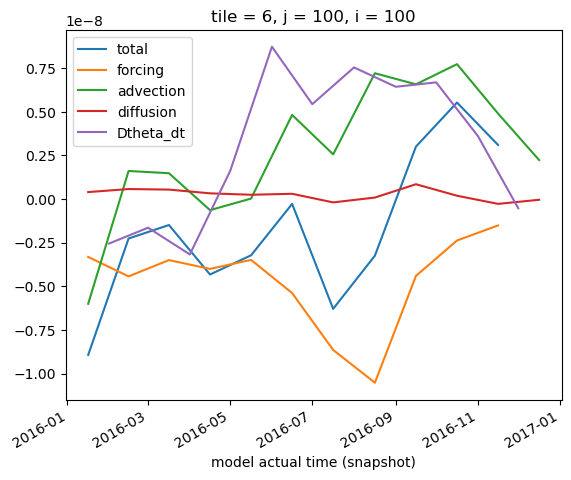

In [109]:
k=6
(G_forcing[:,:-1,:-1,:-1].isel(i=100,j=100) + G_adv.isel(i=100,j=100) + G_diff.isel(i=100,j=100)).mean(dim='k').plot(label='total')
G_forcing[:-1,:-1].isel(i=100,j=100).mean(dim='k').plot(label='forcing')
G_adv.isel(i=100,j=100).mean(dim='k').plot(label='advection')
G_diff.isel(i=100,j=100).mean(dim='k').plot(label='diffusion')
(sTHETA_dt.isel(i=100,j=100).mean(dim='k').plot(label='Dtheta_dt')
#plt.ylim(-1e-6,1e-6)
plt.legend()

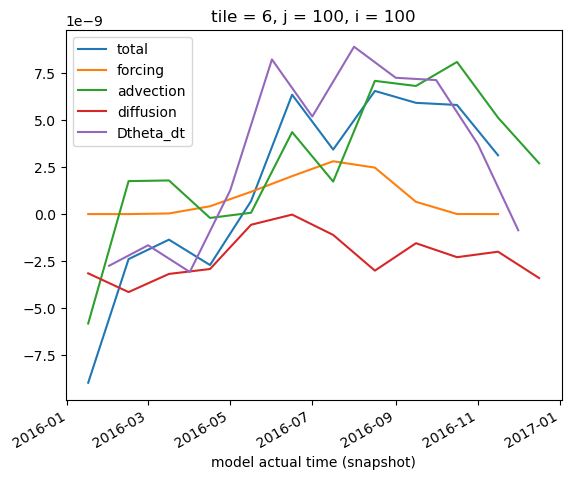

In [111]:
k=6
(G_forcing[:,:-1,:-1,:-1].isel(i=100,j=100) + G_adv.isel(i=100,j=100) + G_diff.isel(i=100,j=100)).isel(k=slice(1,49)).mean(dim='k').plot(label='total')
G_forcing[:-1,:-1].isel(i=100,j=100).isel(k=slice(1,49)).mean(dim='k').plot(label='forcing')
G_adv.isel(i=100,j=100).isel(k=slice(1,49)).mean(dim='k').plot(label='advection')
G_diff.isel(i=100,j=100).isel(k=slice(1,49)).mean(dim='k').plot(label='diffusion')
(sTHETA_dt.isel(i=100,j=100)/(2e6)).isel(k=slice(1,49)).mean(dim='k').plot(label='Dtheta_dt')
#plt.ylim(-1e-6,1e-6)
plt.legend()#forcH_subsurf

/home/basil/miniconda3/envs/opendrift/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/basil/miniconda3/envs/opendrift/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/basil/miniconda3/envs/opendrift/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in multiply
  return func(*(_execute_task(a, cache) for a in args))


NameError: name 'G_forcing' is not defined

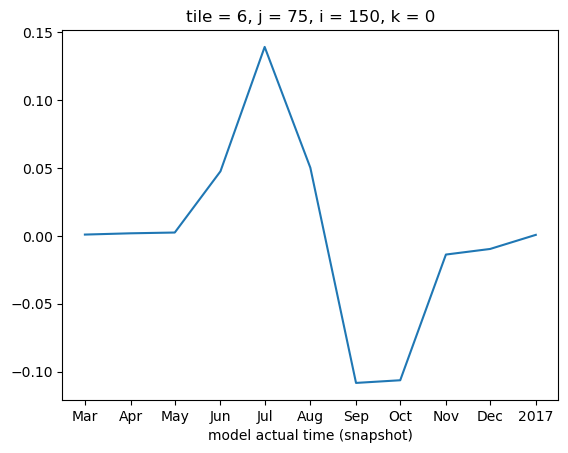

In [39]:
sTHETA_dt.isel(k=0,i=150,j=75).plot()
G_forcing.isel(k=0,i=150,j=75).plot()
G_adv.isel(k=0,i=150,j=75).plot()
G_diff.isel(k=0,i=150,j=75).plot()